In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import easing as easing
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('rossidata')

# Prerequisites
In order to sucessfully run this notebook, you'll need to have the following installed

* FFMPEG (brew install ffmpeg on mac)
* Imagekick (brew install imagemagick)


# Tabel of contents
* [Simple 2D Point Animation](#2dscatter)
* [Swarm Animation](#2dscatterapplication)
* [Animated Barcharts](#animatedbarcharts)


# Loading the data
prior to creating animation, you need to create a class by loading the data itself. Differenet animation methods can then be called on this data

example: 

data=np.random.random((10,2))

animation_class=easing.Eased(data)

or

animation_class2=easing.Eased(pd.Dataframe(data))

## Moving a single point in 2d <a class="anchor" id="2dscatter"></a>

Simply pass MxN numpy array where M is the number of distinct time points, and N is the dimensions for each point. All even numbered columns are X values and odd numbered columns are Y values

To turn a two column (x,y) data source into this format simply use .reshape(1,-1) followed by np.vstack for each row. (see example below)

This function takes the following arguments:

* **n**: the power of the interpolation (the higher the value, the jerkier the animation) - must be positive valued integer.
* **smoothness**: the number of frames actually made in the animation, large smoothness values will result in large files that take a while but look nice. Default is 30.
* **speed** : multiplier of the speed of the animation. Must be a positive valued number : <1 is slower; >1 is faster.
* **destination** : if a destination is given it will save the animation. Extension will indicate the filetype (.gif or .mp4)
* **gif** if set to true, this will display an inline gif for an ipython environmnet. You can save as a gif simply buy adding .gif to the end of of the destination argument as well.
* **plot_kws** : These are matplotlib key word arguments that will be passed to the axis of the animation
* **label**: if True, the indexes of the pandas dataframe will be used to label the discrete time points of the animation



No time vector included - defaulting to number of rows


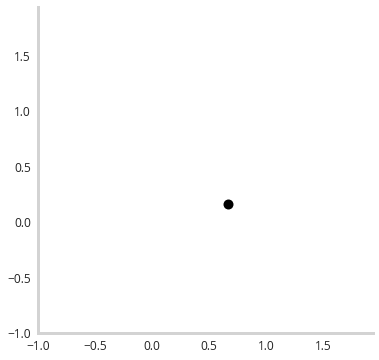

In [2]:
# simple example : one point moving over time
data=np.random.random((10,2))
easing.Eased(data).scatter_animation2d(n=3,speed=0.5,destination='media/singlepoint.gif')

## Moving multiple points in 2d with labels <a class="anchor" id="2dscatterapplication"></a>

The Example above extends to N points. Simply stack arrays in the following format

|X1<sub>t0</sub> Y1<sub>t0</sub> X2<sub>t0</sub> Y2<sub>t0</sub> ... Xn<sub>t0</sub> Yn<sub>t0</sub>|

|X1<sub>t1</sub> Y1<sub>t1</sub> X2<sub>t1</sub> Y2<sub>t1</sub> ... Xn<sub>t1</sub> Yn<sub>t1</sub>|

|X1<sub>t2</sub> Y1<sub>t2</sub> X2<sub>t2</sub> Y2<sub>t2</sub> ... Xn<sub>t2</sub> Yn<sub>t2</sub>|

where each row is a time point


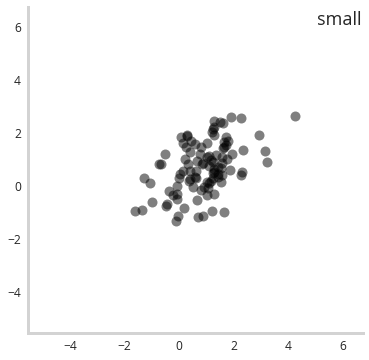

In [3]:
# advanced scatterplot animation : multiple points moving with labels saved as a gif

size=100
u=np.random.multivariate_normal([1,1],[[1, 0.5], [0.5, 1]],size=size).reshape(1,-1)
v=np.random.multivariate_normal([1,1],[[2, 1], [1, 2]],size=size).reshape(1,-1)
w=np.random.multivariate_normal([1,1],[[4, 2], [2, 4]],size=size).reshape(1,-1)

data=pd.DataFrame(np.vstack([u,v,w]),index=['small','medium','large'])
easing.Eased(data).scatter_animation2d(speed=0.5,label=True,plot_kws={'alpha':0.5},destination='media/multipoint.gif')

# Animated Barcharts

This method alows you to create moving barcharts that animate through time. Here the rows are the time points (as above) but the columns here represent the actual values.

You can pass either a dataframe or a numpy array.

This method takes the following arguments:


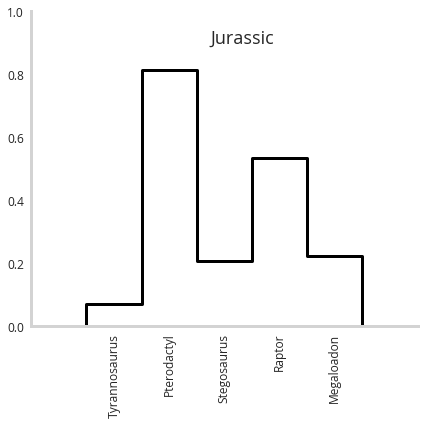

In [4]:
data=pd.DataFrame(abs(np.random.random((3, 5))),
                  index=['Jurassic', 'Cretaceous', 'Precambrian'],
                  columns=['Tyrannosaurus','Pterodactyl','Stegosaurus','Raptor','Megaloadon'])

easing.Eased(data).barchart_animation(plot_kws={'ylim':[0,1],'xlim':[-2,5]},smoothness=40,speed=0.5,label=True)



# Ergodic plots

These plots are meant to show the relationships between time series stochastic processes and the satistical distributions they produce. On the left hand side, we have the time series trace, and on the right we have the distribution as it fills in.

These functions can be called with our without interpolation

No time vector included - defaulting to number of rows


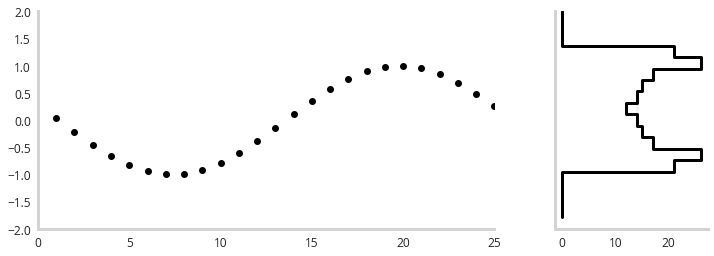

In [41]:
# simple sin wave plot: a simple sine wave without interpolation 
data = np.sin(np.linspace(0,np.pi*16,200))

easing.Eased(data).timeseries_animation(starting_pos = 25,speed=10,norm_hist=False)

No time vector included - defaulting to number of rows


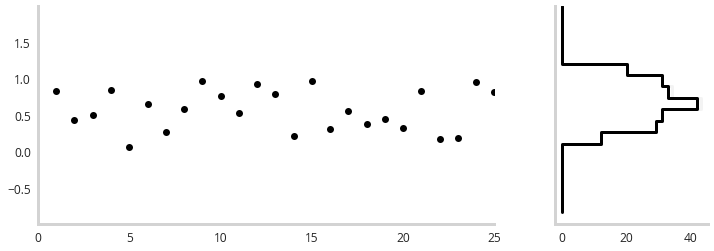

In [42]:
# normal distribution plot without interpolation
data = np.random.rand(200,1)
easing.Eased(data).timeseries_animation(starting_pos = 25,speed=10,norm_hist=False)

No time vector included - defaulting to number of rows


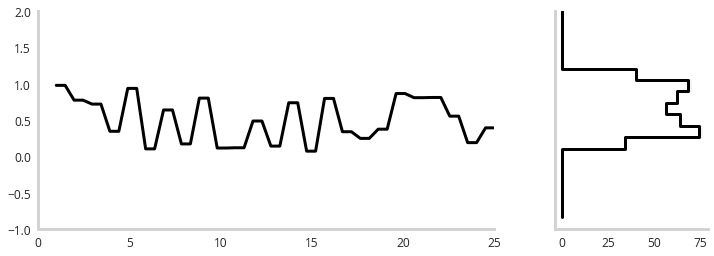

In [39]:
# smoothing out time series plot with interpolation 
# normal distribution plot without interpolation
data = np.random.rand(200,1)
easing.Eased(data).timeseries_animation(starting_pos = 25,interp_freq=2,speed=10,norm_hist=False)

# Time Series Plots
The plots below showcase

No time vector included - defaulting to number of rows


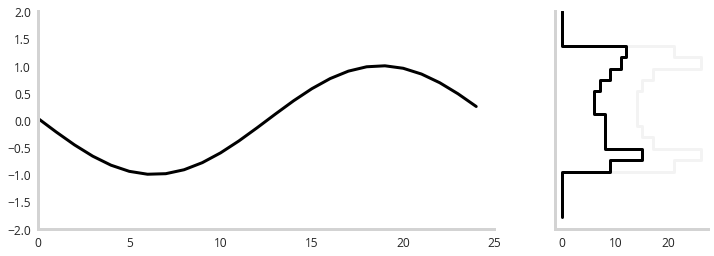

In [5]:
data = np.sin(np.linspace(0,np.pi*16,200))

easing.Eased(data).timeseries_animation(starting_pos = 25,speed=0.5,norm_hist=False)


In [15]:
data = np.random.normal(size=100000)
starting_pos=25
trace_data=data[::-1]
z=1
t0_data=trace_data[-(starting_pos+1)-z:-1-z]
t0_data.shape

(25,)

In [39]:
np.sin(np.arange(200)*(np.pi/4))

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -7.34788079e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        8.57252759e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -9.79717439e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.10218212e-15, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -1.22464680e-15,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        4.89982516e-15, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -1.46957616e-15,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
       -1.96067284e-15, -

(0.9, 1.1, 0.9, 1.1)

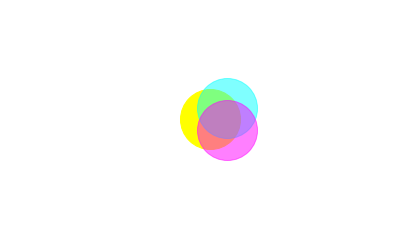

In [46]:
plt.close('all')
fig,ax=plt.subplots()
fig.patch.set_alpha(0.)
ax.plot(1,1,linestyle=None,marker='o',markersize=60,color='yellow',alpha=1)
ax.plot(1.01,1.01,linestyle=None,marker='o',markersize=60,color='cyan',alpha=.5)
ax.plot(1.01,.99,linestyle=None,marker='o',markersize=60,color='magenta',alpha=0.5)

ax.set_xlim([.9,1.1])
ax.set_ylim([.9,1.1])
plt.axis('off')

In [60]:
hex=[882.06, 768.35, 783.8399999999999, 825.0566666666667, 685.62, 881.7633333333333, 587.4, 938.47, 558.068777923294, 955.404388961647, 521.931222076706, 955.404388961647, 492.59999999999997, 938.47, 394.38, 881.7633333333333, 296.15999999999997, 825.0566666666667, 197.94, 768.35, 168.60853296248172, 751.415469611737, 150.53971714356553, 720.1190607777071, 150.54, 686.25, 150.54, 572.8333333333334, 150.54, 459.4166666666667, 150.54, 346, 150.53971714346207, 312.13093922258247, 168.60853296228265, 280.83453038849734, 197.94, 263.9, 296.16, 207.19666666666666, 394.38, 150.49333333333334, 492.6, 93.79, 521.9312220767061, 76.85561103835305, 558.068777923294, 76.85561103835305, 587.4, 93.79, 685.62, 150.49666666666667, 783.8399999999999, 207.20333333333335, 882.06, 263.91, 911.3914670375183, 280.844530388263, 929.4602828564344, 312.1409392222929, 929.4599999999999, 346.01, 929.4599999999999, 459.42333333333335, 929.4599999999999, 572.8366666666667, 929.4599999999999, 686.25, 929.4602828565379, 720.1190607774174, 911.3914670377173, 751.4154696115027, 882.06, 768.35]


circle=[733.79, 849.1, 731.86, 850.2133333333334, 729.93, 851.3266666666667, 728, 852.44, 611.6651951388029, 919.6059309027348, 468.3348048611971, 919.6059309027348, 352, 852.44, 350.07, 851.3266666666667, 348.14, 850.2133333333334, 346.21, 849.1, 229.8738188568156, 781.9332745130232, 158.2084108060285, 657.8034509833541, 158.20999999999998, 523.47, 158.20999999999998, 521.2433333333333, 158.20999999999998, 519.0166666666667, 158.20999999999998, 516.79, 158.2084108060444, 382.45654901660157, 229.87381885684607, 258.326725486941, 346.21, 191.15999999999997, 348.14, 190.04666666666662, 350.07, 188.9333333333333, 352, 187.81999999999996, 468.3348048611971, 120.65406909726522, 611.6651951388028, 120.65406909726522, 728, 187.81999999999996, 729.93, 188.9333333333333, 731.86, 190.04666666666662, 733.79, 191.15999999999997, 850.1261811431843, 258.32672548697684, 921.7915891939714, 382.4565490166459, 921.79, 516.79, 921.79, 519.0166666666667, 921.79, 521.2433333333332, 921.79, 523.4699999999999, 921.7915891939555, 657.8034509833985, 850.1261811431536, 781.9332745130591, 733.79, 849.1]

square=[502.37, 898.23, 379.06333333333333, 684.6533333333333, 255.75666666666666, 471.0766666666667, 132.45, 257.5, 115.72999999999999, 228.5, 136.63, 192.32, 170.07999999999998, 192.32, 416.6966666666666, 192.32, 663.3133333333333, 192.32, 909.93, 192.32, 943.38, 192.32, 964.28, 228.53, 947.56, 257.5, 824.25, 471.0766666666667, 700.9399999999999, 684.6533333333333, 577.63, 898.23, 560.91, 927.2, 519.09, 927.2, 502.37, 898.23]
cross=[649.6, 516.13, 734.0466666666667, 431.68333333333334, 818.4933333333333, 347.2366666666667, 902.94, 262.79, 933.0782189180275, 232.4723069920609, 933.0782189180275, 183.5076930079391, 902.94, 153.19000000000003, 902.94, 153.19000000000003, 902.94, 153.19000000000003, 902.94, 153.19000000000003, 872.622306992061, 123.05178108197262, 823.6576930079392, 123.05178108197259, 793.34, 153.19000000000003, 708.8933333333333, 237.63666666666666, 624.4466666666667, 322.0833333333333, 540, 406.53, 455.55333333333334, 322.08666666666664, 371.1066666666667, 237.64333333333332, 286.66, 153.2, 256.3423069920609, 123.06178108197261, 207.37769300793914, 123.06178108197261, 177.06000000000003, 153.2, 177.06000000000003, 153.2, 177.06000000000003, 153.2, 177.06000000000003, 153.2, 146.9217810819726, 183.51769300793907, 146.92178108197263, 232.4823069920609, 177.06000000000003, 262.79999999999995, 261.50666666666666, 347.2433333333333, 345.9533333333333, 431.68666666666667, 430.4, 516.13, 345.9533333333333, 600.5766666666667, 261.50666666666666, 685.0233333333333, 177.06, 769.47, 146.92178108197257, 799.7876930079391, 146.9217810819726, 848.7523069920609, 177.06, 879.07, 177.06, 879.07, 177.06, 879.07, 177.06, 879.07, 207.37769300793906, 909.2082189180275, 256.34230699206086, 909.2082189180275, 286.65999999999997, 879.07, 371.1066666666666, 794.6233333333333, 455.55333333333334, 710.1766666666667, 540, 625.73, 624.4466666666667, 710.1766666666667, 708.8933333333333, 794.6233333333333, 793.34, 879.07, 823.6576930079392, 909.2082189180275, 872.622306992061, 909.2082189180276, 902.94, 879.07, 902.94, 879.07, 902.94, 879.07, 902.94, 879.07, 933.0782189180275, 848.7523069920609, 933.0782189180275, 799.7876930079391, 902.94, 769.47, 818.4933333333333, 685.0233333333333, 734.0466666666667, 600.5766666666667, 649.6, 516.13]


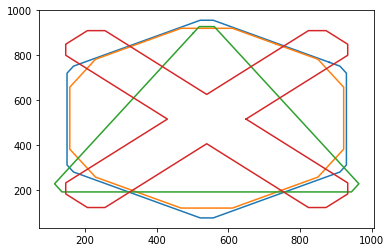

In [64]:
fig,ax=plt.subplots()
ax.plot(hex[::2],hex[1::2])
ax.plot(circle[::2],circle[1::2])
ax.plot(square[::2],square[1::2])
ax.plot(cross[::2],cross[1::2])

In [56]:
#TODO create a list of tupples, chose from this list of tuples which is overall closest to the point on cross

74

In [57]:
len(circle)

74

In [62]:
len(square)

38

In [59]:


from math import remainder

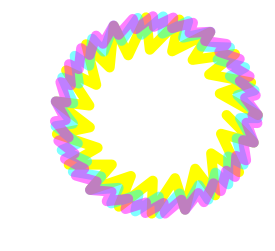

In [47]:
# Drawiong
plt.close('all')
fig,ax=plt.subplots(figsize=(4,4))
color_combos=[('yellow',1),('cyan',0.5),('magenta',0.5)]

for i,n in enumerate([3,4,5]):
    theta=np.arange(0,1001)/1000
    r=np.cos(np.pi/n)/np.cos(2*np.pi*(n*theta)%1/n-np.pi/n)
    ax.plot(r*np.cos(2*np.pi*theta),r*np.sin(2*np.pi*theta),linewidth=10,color=color_combos[i][0],alpha=color_combos[i][1])

plt.axis('off')
fig.savefig('circle.png',dpi=300)


In [62]:
remainder(theta,5)

TypeError: only size-1 arrays can be converted to Python scalars

In [79]:
import math

NameError: name 'color_combos' is not defined

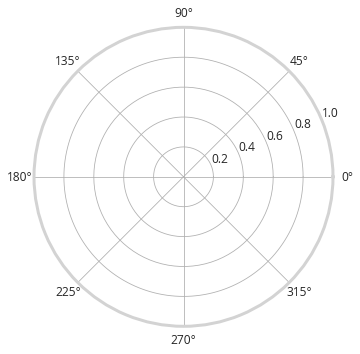

In [46]:
n=6

              
              
ax = plt.subplot(111, projection='polar')

theta = np.linspace(0,2 * np.pi,100) 
for i,n in enumerate([3,5,8]):
    theta = np.linspace(0,2 * np.pi,100) 
    r = np.cosh(theta%(np.pi/(n/2))-np.pi/n)/(2-n*.2)
    
    ax.plot(theta, r,linewidth=10,color=color_combos[i][0],alpha=color_combos[i][1])
#ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
#ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
plt.axis('off')
ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()


In [116]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

for i,n in enumerate([3,5,8]):
    theta = np.linspace(0,2 * np.pi,100) 
    r = np.cosh(theta%(np.pi/(n/2))-np.pi/n)/(2-i*.2)
    x,y=pol2cart(r, theta)
    [*zip(x) for x in zip(x,y)]

In [123]:
theta = np.linspace(0,2 * np.pi,100) 
r = np.cosh(theta%(np.pi/(n/2))-np.pi/n)/(2-i*.2)
x,y=pol2cart(r, theta)
[zip(*l) for l in zip(x,y)]

TypeError: zip argument #1 must support iteration

In [10]:
shapes_df={}

shapes=['triangle','square','pentagon']
theta = np.linspace(0,2 * np.pi,100) 

for j,shape in enumerate(shapes):
    n=j+3
    values=list(zip(np.linspace(0,2 * np.pi,100),np.cosh(theta%(np.pi/(n/2))-np.pi/n)))
    rez=map(lambda x : (x[0] * np.cos(x[1]),(x[0] * np.sin(x[1]))),values)
    shapes_df[shape]=[x for t in list(rez) for x in t]

shapedf=pd.DataFrame.from_dict(shapes_df).T

fig,ax=plt.subplots()
ax.plot()

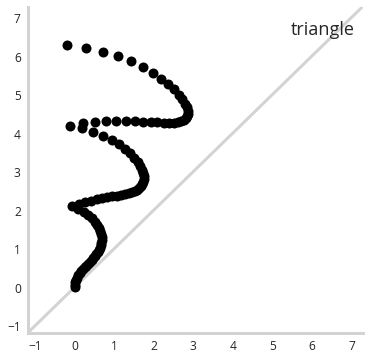

In [11]:

easing.Eased(shapedf).scatter_animation2d(smoothness=40,label=True,inline=True)


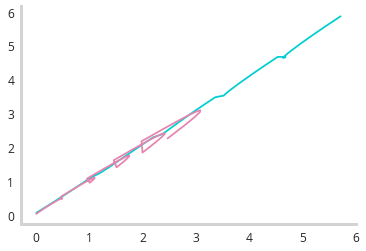

In [27]:
fig,ax=plt.subplots()

values=list(zip(np.linspace(0,2 * np.pi,100),np.cosh(theta%(np.pi/(n/2))-np.pi/n)))
rez=list(map(lambda x : (x[0] * np.sin(x[1]),(x[0] * np.cos(x[1]))),values))
#shapes_df[shape]=[x for t in list(rez) for x in t]
x=rez[0::2]
y=rez[1::2]
ax.plot(x,y)

In [43]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)
              


shapes=['triangle','circle','square','octogon','traingle']
shapes_df={}

ns=[3,100,4,8,3]
for i,shape in enumerate(shapes):
    n=ns[i]
    theta = np.linspace(0,2 * np.pi,50) 
    r = np.cosh(theta%(np.pi/(n/2))-np.pi/n)
    theta,r=pol2cart(r,theta)
    shapes_df[shape]=np.roll([x for t in list(zip(theta,r)) for x in t],8*i)
    
shapedf=pd.DataFrame.from_dict(shapes_df).T
#ax.set_rmax(2)



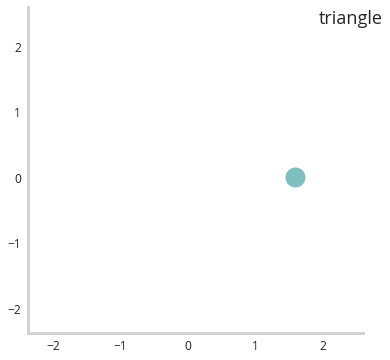

In [45]:
easing.Eased(shapedf).scatter_animation2d(smoothness=40,plot_kws={'color':'teal','s':20,'alpha':0.5},speed=0.25,label=True)


In [6]:
import matplotlib.cm as cm

In [9]:
cm.rainbow(np.arange(50))

array([[0.5       , 0.        , 1.        , 1.        ],
       [0.49215686, 0.01231966, 0.99998103, 1.        ],
       [0.48431373, 0.02463745, 0.99992411, 1.        ],
       [0.47647059, 0.0369515 , 0.99982925, 1.        ],
       [0.46862745, 0.04925994, 0.99969645, 1.        ],
       [0.46078431, 0.06156091, 0.99952572, 1.        ],
       [0.45294118, 0.07385253, 0.99931706, 1.        ],
       [0.44509804, 0.08613294, 0.99907048, 1.        ],
       [0.4372549 , 0.09840028, 0.99878599, 1.        ],
       [0.42941176, 0.11065268, 0.9984636 , 1.        ],
       [0.42156863, 0.12288829, 0.99810333, 1.        ],
       [0.41372549, 0.13510525, 0.99770518, 1.        ],
       [0.40588235, 0.1473017 , 0.99726917, 1.        ],
       [0.39803922, 0.15947579, 0.99679532, 1.        ],
       [0.39019608, 0.17162568, 0.99628365, 1.        ],
       [0.38235294, 0.18374952, 0.99573418, 1.        ],
       [0.3745098 , 0.19584547, 0.99514692, 1.        ],
       [0.36666667, 0.20791169,